Master Batch Schedule- Process Map


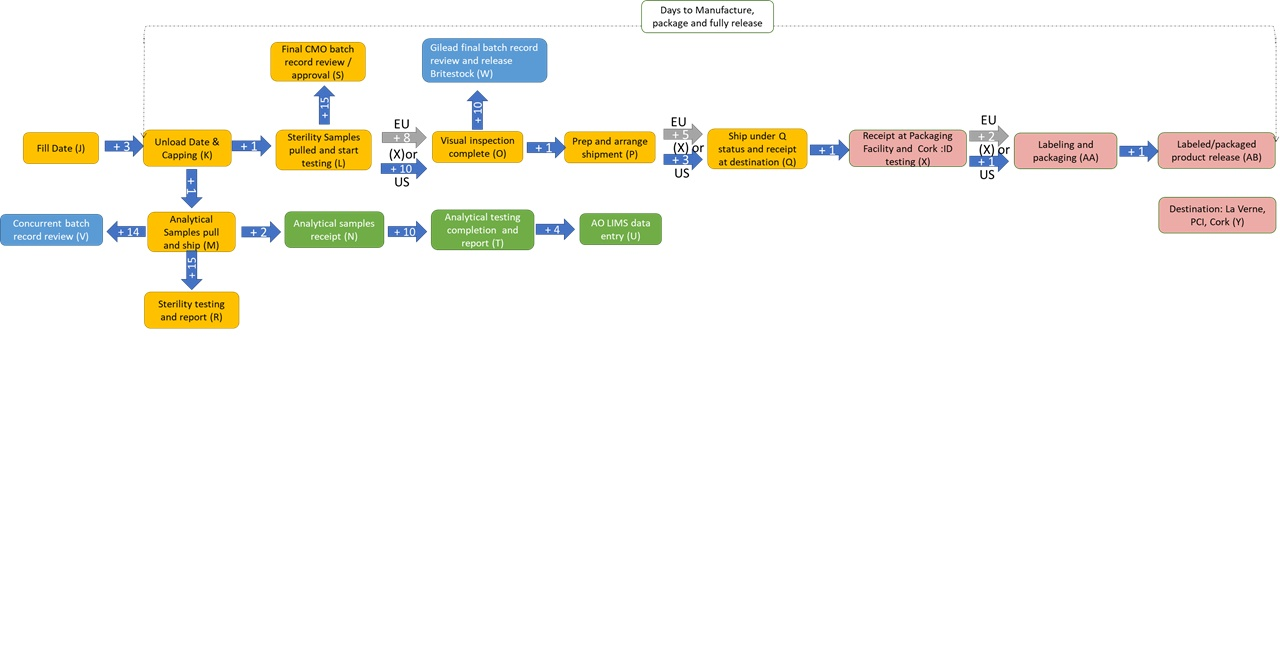

we use the discrete probability distribution to produce the estimates for the days left

$\mu = \sum_i x_i p_i$

$\sigma^2 = \sum_i (x_i - \mu)^2 p_i$

Each step is considered to be independent


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

In [30]:
data1 = pd.read_csv('selected_data_5.csv')  
data1.head()

,PO Number,WO Number,Lot #,Lot Size,API Delivery,API Discharge,Fill Date,Unload Date and Capping,Sterility Samples pulled and start testing,Analytical Samples pull and ship,...,Gilead final batch record review and release Britestock,Ship under Q status and reciept at destination,Receipt at Packaging Facility and Cork :ID testing,Labeling and packaging,Labeled/packaged product release,"Destination: La Verne, PCI, Cork",Targeted Release Date,Vial Qty to package,"Days to Manufacture, package and fully release",Comments
0,Confirmed,CTM,EW2006A1,65377,0,0,3/29/2020,4/2/2020,4/3/2020,4/2/2020,...,5/1/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,PCI,a,65267,38,Ship lot 6 next week if released before lot 14...
1,Confirmed,CTM,EW2008A1,66588,0,0,4/3/2020,4/7/2020,4/8/2020,4/9/2020,...,5/2/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,PCI,a,66588,34,"Plan to ship Monday, Shipping Tuesday May 5th...."
2,Confirmed,CTM,EW2010A1,66895,0,0,4/9/2020,4/13/2020,4/14/2020,4/13/2020,...,5/7/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,PCI,a,66895,29,"ship in Q Tuesday next week, Shipping Tuesday ..."
3,Confirmed,CTM,EW2012A1,66991,0,0,4/14/2020,4/18/2020,4/19/2020,4/19/2020,...,5/12/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,PCI,a,66991,29,Impurity lot. Working to release by 12MAY. Ten...
4,Confirmed,PV1,EW2014A1,66789,0,0,4/19/2020,4/23/2020,4/24/2020,4/23/2020,...,5/30/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,PCI,a,66789,23,Ship to PCI 12MAY under Q; (5/14)delivered to ...


In [31]:
# compute the number of elapsed day since the order is started
cum_days = np.zeros((17, 16))
for ii in range(7, 23):
    for jj in range(17):
        p1 =  pd.to_datetime(data1.iloc[jj, ii]) -  pd.to_datetime(data1.iloc[jj, 6])
        p2 = np.int8(p1.days)
        # print(ii, jj, p2)
        cum_days[jj, ii-7] = p2
print(cum_days)
# print(np.mean(cum_days, axis = 0))

[[ 4.  5.  4.  8. 15. 36. 32. 34. 19. 33. 23. 33. 39. 40. 41. 42.]
 [ 4.  5.  6.  7. 15. 32. 24. 30. 17. 26. 19. 29. 35. 36. 37. 38.]
 [ 4.  5.  4.  5. 15. 27. 21. 20. 15. 25. 14. 28. 30. 31. 32. 33.]
 [ 4.  5.  5.  6. 15. 29. 24. 20. 16. 28. 14. 28. 30. 31. 32. 33.]
 [ 4.  5.  4.  5. 15. 23. 19. 20. 29. 29. 24. 41. 24. 25. 26. 27.]
 [ 4.  5.  5.  6. 15. 18. 20. 20. 28. 30. 21. 40. 19. 20. 21. 22.]
 [ 4.  5.  5.  6. 15. 16. 20. 20. 27. 29. 19. 38. 19. 20. 21. 22.]
 [ 4.  7.  7.  8. 17. 21. 21. 22. 19. 25. 16. 26. 24. 22. 26. 28.]
 [ 4.  6.  7.  8. 16. 22. 22. 23. 16. 22. 15. 23. 22. 23. 24. 25.]
 [ 4.  6.  7.  8. 16. 22. 22. 23. 16. 22. 15. 23. 22. 23. 28. 29.]
 [ 4.  4.  5.  6. 14. 15. 18. 22. 14. 21. 20. 22. 18. 36. 37. 38.]
 [ 4.  6.  7.  8. 16. 24. 20. 22. 17. 24. 21. 28. 27. 28. 29. 30.]
 [ 3.  5.  9. 10. 15. 16. 24. 25. 20. 28. 23. 29. 19. 20. 21. 22.]
 [ 3.  4.  6.  7. 14. 15. 18. 21. 17. 19. 20. 22. 18. 19. 20. 21.]
 [ 3.  5.  6.  7. 15. 16. 21. 21. 17. 21. 20. 25. 19. 20. 21. 

[ 3.8  5.2  5.7  7.  15.2 21.5 21.5 22.6 18.9 25.1 18.9 28.6 23.8 25.6
 27.  28.1] [0.4 0.7 1.3 1.2 0.7 6.2 3.2 3.8 4.5 3.8 3.1 5.9 6.2 6.6 6.5 6.5]


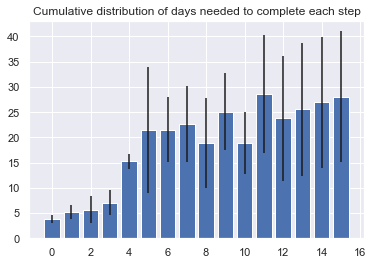

In [32]:
# compute the discrete probability distribution for each step
nr_days = cum_days.shape[1]
means_cum = np.zeros(nr_days)
stds_cum = np.zeros(nr_days)
for ii in range(nr_days):
    u, counts = np.unique(cum_days[:, ii], return_counts=True)
    # print(u, counts)
    
    # determine the expected mean at each step
    means_cum[ii] = sum(u*counts/sum(counts))
    # determine the standard deviation at each step
    stds_cum[ii] = np.sqrt(sum((u-means_cum[ii])**2*counts/sum(counts)))
    
print(np.round(means_cum, 1), np.round(stds_cum, 1))

# use 2 standard deviation error bars
plt.bar(range(nr_days), means_cum, yerr = 2*stds_cum)
plt.title('Cumulative distribution of days needed to complete each step')
plt.show()

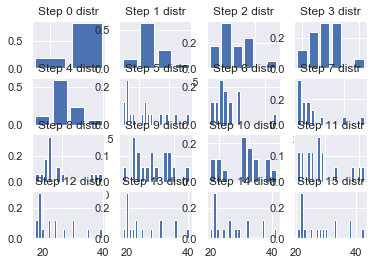

In [33]:
# display the discrete probability distribution at each step
fig, axs = plt.subplots(4, 4)
for ii in range(4):
    for jj in range(4):
        kk = 4*ii + jj
        u, counts = np.unique(cum_days[:, kk], return_counts=True)
        axs[ii, jj].bar(u,counts/sum(counts))
        axs[ii, jj].set_title('Step ' + str(kk) + ' distr')
        # axs[ii, jj].set_xlim([np.min(a1)- 1, np.max(a1) + 1])
        # axs[ii, jj].set_ylim([0, 1])

In [34]:
# compute the step to step differences, here taken as independent
diff_days = np.zeros((17, 16))
for ii in range(7, 23):
    for jj in range(17):
        p1 =  pd.to_datetime(data1.iloc[jj, ii]) -  pd.to_datetime(data1.iloc[jj, ii - 1])
        p2 = np.int8(p1.days)
        # print(ii, jj, p2)
        diff_days[jj, ii-7] = p2
# print(diff_days)
# print(np.mean(diff_days, axis = 0))

[ 0.   1.4  0.5  1.3  8.2  6.2  0.   1.1 -3.7  6.2 -6.1  9.6 -4.8  1.8
  1.4  1.1] [0.  0.7 1.2 0.7 1.2 6.1 4.3 2.1 6.3 3.6 4.  5.2 7.8 4.1 1.1 0.2]


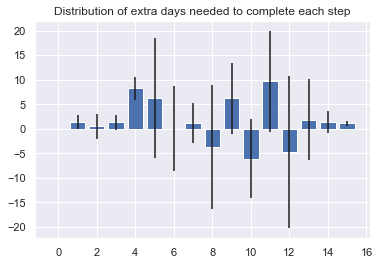

In [35]:
# show the step by step expectations for mean and standard deviation
means_diff = np.zeros(nr_days)
stds_diff = np.zeros(nr_days)
for ii in range(1, nr_days):
    u, counts = np.unique(diff_days[:, ii], return_counts=True)
    # print(u, counts)
    means_diff[ii] = sum(u*counts/sum(counts))
    stds_diff[ii] = np.sqrt(sum((u-means_diff[ii])**2*counts/sum(counts)))
    
print(np.round(means_diff, 1), np.round(stds_diff, 1))
plt.bar(range(nr_days), means_diff, yerr = 2*stds_diff)
plt.title('Distribution of extra days needed to complete each step')
plt.show()

[[ 7. 28. 24. 26. 11. 25. 15. 25. 31. 32. 33. 34.]
 [ 8. 25. 17. 23. 10. 19. 12. 22. 28. 29. 30. 31.]
 [10. 22. 16. 15. 10. 20.  9. 23. 25. 26. 27. 28.]
 [ 9. 23. 18. 14. 10. 22.  8. 22. 24. 25. 26. 27.]
 [10. 18. 14. 15. 24. 24. 19. 36. 19. 20. 21. 22.]
 [ 9. 12. 14. 14. 22. 24. 15. 34. 13. 14. 15. 16.]
 [ 9. 10. 14. 14. 21. 23. 13. 32. 13. 14. 15. 16.]
 [ 9. 13. 13. 14. 11. 17.  8. 18. 16. 14. 18. 20.]
 [ 8. 14. 14. 15.  8. 14.  7. 15. 14. 15. 16. 17.]
 [ 8. 14. 14. 15.  8. 14.  7. 15. 14. 15. 20. 21.]
 [ 8.  9. 12. 16.  8. 15. 14. 16. 12. 30. 31. 32.]
 [ 8. 16. 12. 14.  9. 16. 13. 20. 19. 20. 21. 22.]
 [ 5.  6. 14. 15. 10. 18. 13. 19.  9. 10. 11. 12.]
 [ 7.  8. 11. 14. 10. 12. 13. 15. 11. 12. 13. 14.]
 [ 8.  9. 14. 14. 10. 14. 13. 18. 12. 13. 14. 15.]
 [ 8.  9. 12. 13. 10. 14. 12. 18. 12. 13. 14. 15.]
 [ 9. 10. 13. 14. 10. 16. 12. 19. 13. 14. 15. 16.]]
[ 8.2 14.5 14.5 15.6 11.9 18.1 11.9 21.6 16.8 18.6 20.  21.1] [1.2 6.4 3.  3.4 4.9 4.1 3.1 6.4 6.3 6.9 6.7 6.7]


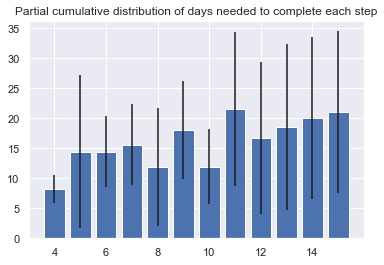

In [36]:
# if starting point is not the first step, probability distribution for the remaining steps is computed
# all instances are computed first
nr_step_completed = 4
partial_cum_days = np.zeros((17, 16 - nr_step_completed))
for ii in range(7 + nr_step_completed, 23):
    for jj in range(17):
        p1 =  pd.to_datetime(data1.iloc[jj, ii]) -  pd.to_datetime(data1.iloc[jj, 6 + nr_step_completed])
        p2 = np.int8(p1.days)
        # print(ii, jj, p2)
        partial_cum_days[jj, ii-7 - nr_step_completed] = p2
print(partial_cum_days)

# probability distribution and expected values are computed here
nr_partial_days = partial_cum_days.shape[1]
means_partial_cum = np.zeros(nr_partial_days)
stds_partial_cum = np.zeros(nr_partial_days)
for ii in range(nr_partial_days):
    u, counts = np.unique(partial_cum_days[:, ii], return_counts=True)
    # print(u, counts)
    means_partial_cum[ii] = sum(u*counts/sum(counts))
    stds_partial_cum[ii] = np.sqrt(sum((u-means_partial_cum[ii])**2*counts/sum(counts)))
    
# bar graph for mean/std are shown here
print(np.round(means_partial_cum, 1), np.round(stds_partial_cum, 1))
plt.bar(range(nr_step_completed, nr_step_completed + nr_partial_days), means_partial_cum, yerr = 2*stds_partial_cum)
plt.title('Partial cumulative distribution of days needed to complete each step')
plt.show()

[[ 4.  5.  4.  8. 15. 36. 32. 34. 19. 33. 23. 33. 39. 40. 41. 42.]
 [ 4.  5.  6.  7. 15. 32. 24. 30. 17. 26. 19. 29. 35. 36. 37. 38.]
 [ 4.  5.  4.  5. 15. 27. 21. 20. 15. 25. 14. 28. 30. 31. 32. 33.]
 [ 4.  5.  4.  5. 15. 23. 19. 20. 29. 29. 24. 41. 24. 25. 26. 27.]
 [ 4.  5.  5.  6. 15. 18. 20. 20. 28. 30. 21. 40. 19. 20. 21. 22.]
 [ 4.  5.  5.  6. 15. 16. 20. 20. 27. 29. 19. 38. 19. 20. 21. 22.]
 [ 4.  7.  7.  8. 17. 21. 21. 22. 19. 25. 16. 26. 24. 22. 26. 28.]
 [ 4.  6.  7.  8. 16. 22. 22. 23. 16. 22. 15. 23. 22. 23. 24. 25.]
 [ 4.  6.  7.  8. 16. 22. 22. 23. 16. 22. 15. 23. 22. 23. 28. 29.]
 [ 4.  4.  5.  6. 14. 15. 18. 22. 14. 21. 20. 22. 18. 36. 37. 38.]
 [ 4.  6.  7.  8. 16. 24. 20. 22. 17. 24. 21. 28. 27. 28. 29. 30.]
 [ 3.  5.  9. 10. 15. 16. 24. 25. 20. 28. 23. 29. 19. 20. 21. 22.]
 [ 3.  4.  6.  7. 14. 15. 18. 21. 17. 19. 20. 22. 18. 19. 20. 21.]
 [ 3.  5.  6.  7. 15. 16. 21. 21. 17. 21. 20. 25. 19. 20. 21. 22.]
 [ 4.  5.  5.  7. 15. 16. 19. 20. 17. 21. 19. 25. 19. 20. 21. 

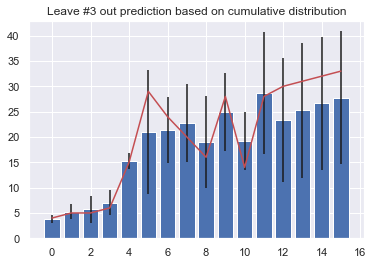

In [37]:
# predictions, change point below
eliminate_point = 3

# compute the number of elapsed day since the order is started
cum_elim_one_point_days = np.zeros((17 - 1, 16))
for ii in range(7, 23):
    p3 = list(set(range(17)).difference({eliminate_point}))
    for jj in range(len(p3)):
        p1 =  pd.to_datetime(data1.iloc[p3[jj], ii]) -  pd.to_datetime(data1.iloc[p3[jj], 6])
        p2 = np.int8(p1.days)
        # print(ii, jj, p2)
        cum_elim_one_point_days[jj, ii-7] = p2
print(cum_elim_one_point_days)

nr_elim_one_point_days = cum_elim_one_point_days.shape[1]
means_elim_one_point_cum = np.zeros(nr_elim_one_point_days)
stds_elim_one_point_cum = np.zeros(nr_elim_one_point_days)
for ii in range(nr_elim_one_point_days):
    u, counts = np.unique(cum_elim_one_point_days[:, ii], return_counts=True)
    # print(u, counts)
    
    # determine the expected mean at each step
    means_elim_one_point_cum[ii] = sum(u*counts/sum(counts))
    # determine the standard deviation at each step
    stds_elim_one_point_cum[ii] = np.sqrt(sum((u-means_elim_one_point_cum[ii])**2*counts/sum(counts)))
    
print(np.round(means_elim_one_point_cum, 1), np.round(stds_elim_one_point_cum, 1))

# use 1 standard deviation error bars
plt.bar(range(nr_elim_one_point_days), means_elim_one_point_cum, yerr = 2*stds_elim_one_point_cum)
plt.plot(cum_days[eliminate_point, :], 'r')
plt.title('Leave #' + str(eliminate_point) +  ' out prediction based on cumulative distribution')
plt.show()

In [38]:
print(cum_days)
print(np.round(means_cum, 1))
print(np.round(stds_cum, 1))

[[ 4.  5.  4.  8. 15. 36. 32. 34. 19. 33. 23. 33. 39. 40. 41. 42.]
 [ 4.  5.  6.  7. 15. 32. 24. 30. 17. 26. 19. 29. 35. 36. 37. 38.]
 [ 4.  5.  4.  5. 15. 27. 21. 20. 15. 25. 14. 28. 30. 31. 32. 33.]
 [ 4.  5.  5.  6. 15. 29. 24. 20. 16. 28. 14. 28. 30. 31. 32. 33.]
 [ 4.  5.  4.  5. 15. 23. 19. 20. 29. 29. 24. 41. 24. 25. 26. 27.]
 [ 4.  5.  5.  6. 15. 18. 20. 20. 28. 30. 21. 40. 19. 20. 21. 22.]
 [ 4.  5.  5.  6. 15. 16. 20. 20. 27. 29. 19. 38. 19. 20. 21. 22.]
 [ 4.  7.  7.  8. 17. 21. 21. 22. 19. 25. 16. 26. 24. 22. 26. 28.]
 [ 4.  6.  7.  8. 16. 22. 22. 23. 16. 22. 15. 23. 22. 23. 24. 25.]
 [ 4.  6.  7.  8. 16. 22. 22. 23. 16. 22. 15. 23. 22. 23. 28. 29.]
 [ 4.  4.  5.  6. 14. 15. 18. 22. 14. 21. 20. 22. 18. 36. 37. 38.]
 [ 4.  6.  7.  8. 16. 24. 20. 22. 17. 24. 21. 28. 27. 28. 29. 30.]
 [ 3.  5.  9. 10. 15. 16. 24. 25. 20. 28. 23. 29. 19. 20. 21. 22.]
 [ 3.  4.  6.  7. 14. 15. 18. 21. 17. 19. 20. 22. 18. 19. 20. 21.]
 [ 3.  5.  6.  7. 15. 16. 21. 21. 17. 21. 20. 25. 19. 20. 21. 

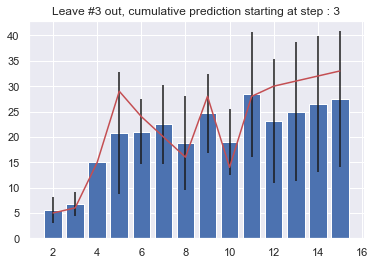

In [39]:
# if needed, one point left out can be predicted from an intermediate point
# predictions, change sample number and starting day below
eliminate_point = 3
nr_step_completed = 2


# compute the number of elapsed day since the order is started
cum_elim_one_point_part_days = np.zeros((17 - 1, 16 - nr_step_completed))
for ii in range(7 + nr_step_completed, 23):
    p3 = list(set(range(17)).difference({eliminate_point}))
    for jj in range(len(p3)):
        p1 =  pd.to_datetime(data1.iloc[p3[jj], ii]) -  pd.to_datetime(data1.iloc[p3[jj], 6 + nr_step_completed])
        p2 = np.int8(p1.days)
        # print(ii, jj, p2)
        cum_elim_one_point_part_days[jj, ii-7- nr_step_completed] = p2
        
# print(cum_elim_one_point_part_days)

nr_elim_one_point_part_days = cum_elim_one_point_part_days.shape[1]
means_elim_one_point_part_cum = np.zeros(nr_elim_one_point_part_days)
stds_elim_one_point_part_cum = np.zeros(nr_elim_one_point_part_days)
for ii in range(nr_elim_one_point_part_days):
    u, counts = np.unique(cum_elim_one_point_part_days[:, ii], return_counts=True)
    # print(u, counts)
    
    # determine the expected mean at each step
    means_elim_one_point_part_cum[ii] = sum(u*counts/sum(counts))
    # determine the standard deviation at each step
    stds_elim_one_point_part_cum[ii] = np.sqrt(sum((u-means_elim_one_point_part_cum[ii])**2*counts/sum(counts)))
    
# print(np.round(means_elim_one_point_part_cum, 1), np.round(stds_elim_one_point_part_cum, 1))

# use 2 standard deviations error bars
plt.bar(range(nr_step_completed, nr_step_completed + nr_elim_one_point_part_days), cum_days[eliminate_point, nr_step_completed] + means_elim_one_point_part_cum, yerr = 2*stds_elim_one_point_part_cum)
plt.plot(range(nr_step_completed, cum_days.shape[1]), cum_days[eliminate_point, nr_step_completed:], 'r')
plt.title('Leave #' + str(eliminate_point) + ' out, cumulative prediction starting at step : ' + str(1 + nr_step_completed))
plt.show()


In [40]:
def return_estimates(eliminate_point, nr_step_completed):
    cum_elim_one_point_part_days = np.zeros((17 - 1, 16 - nr_step_completed))
    for ii in range(7 + nr_step_completed, 23):
        p3 = list(set(range(17)).difference({eliminate_point}))
        for jj in range(len(p3)):
            p1 =  pd.to_datetime(data1.iloc[p3[jj], ii]) -  pd.to_datetime(data1.iloc[p3[jj], 6 + nr_step_completed])
            p2 = np.int8(p1.days)
            # print(ii, jj, p2)
            cum_elim_one_point_part_days[jj, ii-7- nr_step_completed] = p2
    nr_elim_one_point_part_days = cum_elim_one_point_part_days.shape[1]
    means_elim_one_point_part_cum = np.zeros(nr_elim_one_point_part_days)
    stds_elim_one_point_part_cum = np.zeros(nr_elim_one_point_part_days)
    for ii in range(nr_elim_one_point_part_days):
        u, counts = np.unique(cum_elim_one_point_part_days[:, ii], return_counts=True)
        # print(u, counts)
        # determine the expected mean at each step
        means_elim_one_point_part_cum[ii] = sum(u*counts/sum(counts))
        # determine the standard deviation at each step
        stds_elim_one_point_part_cum[ii] = np.sqrt(sum((u-means_elim_one_point_part_cum[ii])**2*counts/sum(counts)))
        
    return means_elim_one_point_part_cum, stds_elim_one_point_part_cum
    
(means_elim_one_point_part_cum, stds_elim_one_point_part_cum) = return_estimates(3, 4)
print(means_elim_one_point_part_cum, stds_elim_one_point_part_cum)

[ 8.1875 13.9375 14.25   15.6875 12.     17.8125 12.1875 21.5625 16.3125
 18.1875 19.625  20.6875] [1.18420596 6.18939365 2.90473751 3.4409074  5.07444578 4.09601559
 3.06632414 6.61408299 6.24218261 6.91211572 6.781178   6.77051281]


In [41]:
def return_estimates_exp(eliminate_point, nr_step_completed):
    cum_elim_one_point_part_days = np.zeros((17 - 1, 16 - nr_step_completed))
    for ii in range(7 + nr_step_completed, 23):
        p3 = list(set(range(17)).difference({eliminate_point}))
        for jj in range(len(p3)):
            p1 =  pd.to_datetime(data1.iloc[p3[jj], ii]) -  pd.to_datetime(data1.iloc[p3[jj], 6 + nr_step_completed])
            p2 = np.int8(p1.days)
            # print(ii, jj, p2)
            cum_elim_one_point_part_days[jj, ii-7- nr_step_completed] = p2
    nr_elim_one_point_part_days = cum_elim_one_point_part_days.shape[1]
    means_elim_one_point_part_cum = np.zeros(nr_elim_one_point_part_days)
    stds_elim_one_point_part_cum = np.zeros(nr_elim_one_point_part_days)
    for ii in range(nr_elim_one_point_part_days):
        u, counts = np.unique(cum_elim_one_point_part_days[:, ii], return_counts=True)
        # print(u, counts)
        # determine the expected mean at each step
        means_elim_one_point_part_cum[ii] = sum(u*counts/sum(counts))
        # determine the standard deviation at each step
        stds_elim_one_point_part_cum[ii] = np.sqrt(sum((u-means_elim_one_point_part_cum[ii])**2*counts/sum(counts)))
        
    return means_elim_one_point_part_cum, stds_elim_one_point_part_cum
    
(means_elim_one_point_part_cum, stds_elim_one_point_part_cum) = return_estimates(3, 4)
print(means_elim_one_point_part_cum, stds_elim_one_point_part_cum)

[ 8.1875 13.9375 14.25   15.6875 12.     17.8125 12.1875 21.5625 16.3125
 18.1875 19.625  20.6875] [1.18420596 6.18939365 2.90473751 3.4409074  5.07444578 4.09601559
 3.06632414 6.61408299 6.24218261 6.91211572 6.781178   6.77051281]


In [42]:
import datetime
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from ipywidgets import widgets

default_eliminate_point = 8
default_nr_step_completed = 8

N_points = 14
N_steps = 16

(means_elim_one_point_part_cum, stds_elim_one_point_part_cum) = return_estimates(default_eliminate_point-1, default_nr_step_completed-1)


month = widgets.IntSlider(
    value=1.0,
    min=1.0,
    max=12.0,
    step=1.0,
    description='Months:',
    continuous_update=False
)

exp_or_uniform = widgets.Checkbox(
    description='Exponential: (default uniform)',
    value=True,
)

container = widgets.HBox(children=[exp_or_uniform, month])

steps1 = widgets.Dropdown(
    description='Completed:   ',
    value=str(default_eliminate_point),
    options= [str(x) for x in range(1, N_points + 1)]
)

prediction1 = widgets.Dropdown(
    options= [str(x) for x in range(1, N_steps + 1)], 
    value=str(default_nr_step_completed),
    description='Prediction:',
)

# plt.bar(range(nr_step_completed, nr_step_completed + nr_elim_one_point_part_days), cum_days[eliminate_point, nr_step_completed] + means_elim_one_point_part_cum, yerr = 2*stds_elim_one_point_part_cum)

# Assign an empty figure widget with two traces
trace1 = go.Bar(
    x=list(range(default_nr_step_completed, default_nr_step_completed + nr_elim_one_point_part_days)),
    y=cum_days[default_eliminate_point - 1, default_nr_step_completed-1] + means_elim_one_point_part_cum,
    error_y=dict(type='data', array=2*stds_elim_one_point_part_cum),
    name='RDV batch',
    # marker_color='#3D9970'
    marker_color='blue')

trace2 = go.Scatter(x=list(range(default_nr_step_completed, cum_days.shape[1])), y=cum_days[default_eliminate_point - 1, default_nr_step_completed-1:],
                    mode='lines',
                    name='Prediction')

g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='RDV batch prediction'
                        ),
                        barmode='overlay'
                    ))

def response(change): 
    if exp_or_uniform.value:
        (means_elim_one_point_part_cum_1, stds_elim_one_point_part_cum_1) = return_estimates_exp(
            int(prediction1.value)-1, int(steps1.value)-1)
    else:
        (means_elim_one_point_part_cum_1, stds_elim_one_point_part_cum_1) = return_estimates(
            int(prediction1.value)-1, int(steps1.value)-1)
        
    g.data[0].error_y.array = stds_elim_one_point_part_cum_1
    g.data[0].y = means_elim_one_point_part_cum_1 + cum_days[int(prediction1.value) - 1, int(steps1.value)-1] 
    g.data[0].x = np.array(range(int(steps1.value), 16))
    g.data[1].y = cum_days[int(prediction1.value)-1, int(steps1.value)-1:]
    g.data[1].x = np.array(range(int(steps1.value), 16))
    
    # print(range(int(steps1.value), 16))
    g.layout.xaxis.title = 'Steps'
    g.layout.yaxis.title = 'Days'

prediction1.observe(response, names="value")
steps1.observe(response, names="value")
month.observe(response, names="value")
exp_or_uniform.observe(response, names="value")

container2 = widgets.HBox([prediction1, steps1])
widgets.VBox([container,
              container2,
              g])